In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, GridSearchCV
import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, classification_report
import pickle

In [78]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [79]:
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


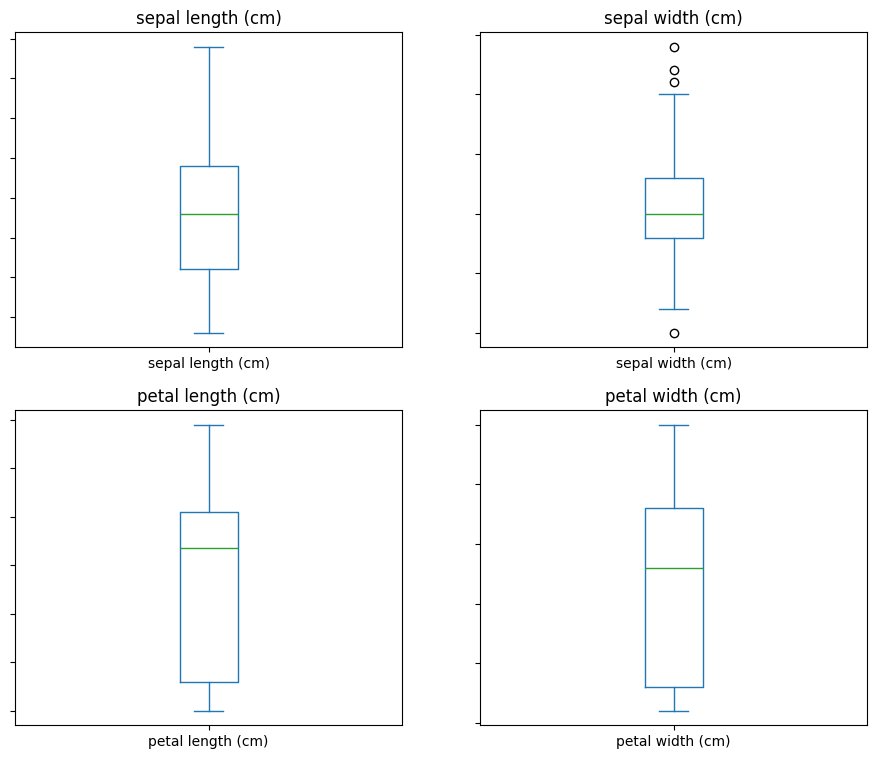

In [15]:
def boxplot_iris(feature_names, dataset):
  i = 1
  plt.figure(figsize=(11, 9))
  for col in feature_names:
    plt.subplot(2, 2, i)
    plt.axis('on')
    plt.tick_params(axis='both', left=True,
                    top=False, right=False,
                    bottom=True, labelleft=False,
                    labeltop=False, labelright=False,
                    labelbottom=True)
    dataset[col].plot(kind="box", subplots=True, sharex=False)
    plt.title(col)
    i += 1
  plt.show()

boxplot_iris(iris.columns[:], iris)

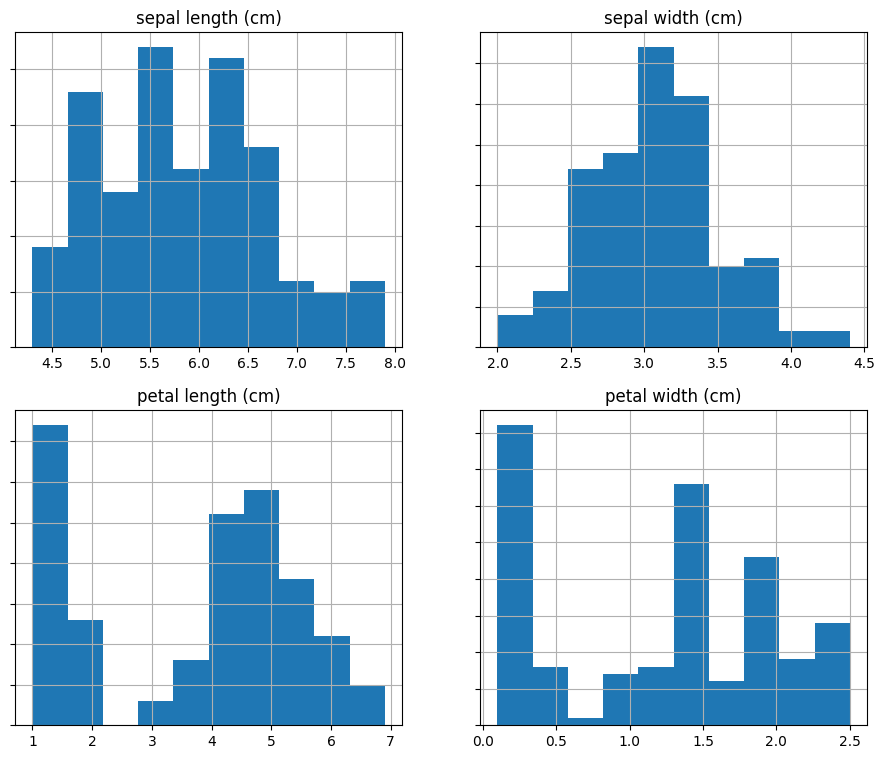

In [16]:
def histogram_iris(feature_names, dataset):
  i = 1
  plt.figure(figsize=(11, 9))
  for col in feature_names:
    plt.subplot(2, 2, i)
    plt.axis('on')
    plt.tick_params(axis='both', left=True,
                    top=False, right=False,
                    bottom=True, labelleft=False,
                    labeltop=False, labelright=False,
                    labelbottom=True)
    dataset[col].hist()
    plt.title(col)
    i += 1
  plt.show()

histogram_iris(iris.columns[:], iris)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = iris
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
)

In [38]:
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [39]:
model.score(X_test, y_test)

0.98

In [40]:
# Importa funciones para realizar validación cruzada y dividir datos.


# Configura un objeto de validación cruzada con 10 particiones (folds) y mezcla aleatoria.
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Calcula las puntuaciones de validación cruzada para el modelo usando los datos de entrenamiento.
results = cross_val_score(model, X_train, y_train, cv=cv)

# Calcula el promedio de las puntuaciones obtenidas en la validación cruzada.
fin_result = np.mean(results)

# Itera sobre las puntuaciones y las imprime con el índice de la iteración.
for i, score in enumerate(results):
    suffix = "th" if 10 <= i % 100 <= 20 else ("st" if i % 10 == 1 else ("nd" if i % 10 == 2 else ("rd" if i % 10 == 3 else "th")))
    print(f'{i}{suffix} puntuación de validación cruzada : {score:.1f}')

# Imprime el promedio final de las puntuaciones de validación cruzada.
print(f'Puntuación final de la validación cruzada: {fin_result:.2f}')

# Configura StratifiedKFold con 10 particiones y mezcla aleatoria.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcula las puntuaciones de validación cruzada estratificada.
results = cross_val_score(model, X_train, y_train, cv=cv)

# Calcula el promedio de las puntuaciones obtenidas.
fin_result = np.mean(results)

# Imprime las puntuaciones para cada fold y su índice.
for i, score in enumerate(results):
    suffix = "th" if 10 <= i % 100 <= 20 else ("st" if i % 10 == 1 else ("nd" if i % 10 == 2 else ("rd" if i % 10 == 3 else "th")))
    print(f'{i}{suffix} puntuación de validación cruzada : {score:.1f}')

# Imprime el promedio final de validación cruzada estratificada.
print(f'Puntuación final de validación cruzada estratificada : {fin_result}')

0th puntuación de validación cruzada : 0.9
1st puntuación de validación cruzada : 1.0
2nd puntuación de validación cruzada : 0.8
3rd puntuación de validación cruzada : 1.0
4th puntuación de validación cruzada : 0.8
5th puntuación de validación cruzada : 0.9
6th puntuación de validación cruzada : 1.0
7th puntuación de validación cruzada : 0.9
8th puntuación de validación cruzada : 1.0
9th puntuación de validación cruzada : 1.0
Puntuación final de la validación cruzada: 0.93
0th puntuación de validación cruzada : 0.9
1st puntuación de validación cruzada : 0.9
2nd puntuación de validación cruzada : 0.8
3rd puntuación de validación cruzada : 0.9
4th puntuación de validación cruzada : 1.0
5th puntuación de validación cruzada : 1.0
6th puntuación de validación cruzada : 0.9
7th puntuación de validación cruzada : 0.8
8th puntuación de validación cruzada : 1.0
9th puntuación de validación cruzada : 1.0
Puntuación final de validación cruzada estratificada : 0.9199999999999999


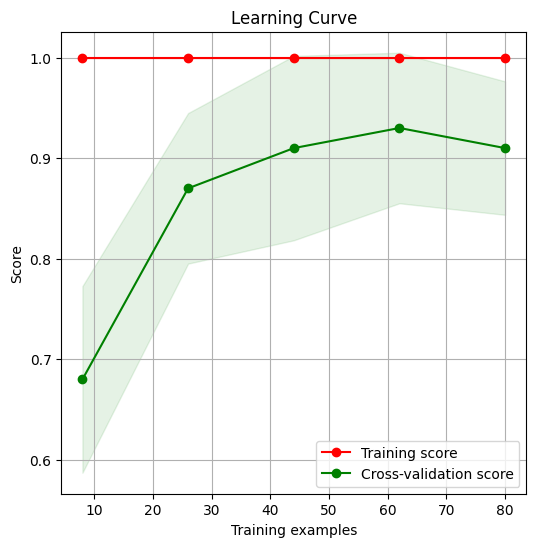

In [41]:
# Importa la librería scikit-plot para generar gráficos relacionados con el aprendizaje automático.
# Importa matplotlib para la creación de gráficos.
# Genera y muestra una curva de aprendizaje para el modelo.
skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(6,6))
plt.show()

In [81]:
model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=42,max_leaf_nodes=None,min_impurity_decrease=0.0,class_weight=None)

In [45]:

estimator = DecisionTreeClassifier()

parameters = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
    'random_state': [7, 23, 42, 78, 142],
    'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
}

model2 = GridSearchCV(estimator=estimator, param_grid=parameters, cv=KFold(10), n_jobs=-1, verbose=1, refit=True)

model2.fit(X_train, y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


/Users/alemr214/Developer/courses/samsung_innovation_campus/.venv/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78, 142],
                         'splitter': ['best', 'random']},
             verbose=1)

In [52]:
pred = model2.predict(X_test)

In [53]:
precision = precision_score(y_test, pred, average=None)
for target, score in zip(data.target_names, precision):
    print(f'Precision para {target} : {score:.2f}')

Precision para setosa : 1.00
Precision para versicolor : 0.94
Precision para virginica : 1.00


In [54]:
recalls = recall_score(y_test, model2.predict(X_test), average=None)
for target, score in zip(data.target_names, recalls):
    print(f'{target} sensibilidad: {score:.2f}')

setosa sensibilidad: 1.00
versicolor sensibilidad: 1.00
virginica sensibilidad: 0.94


In [58]:
specificy = precision_score(y_test, model2.predict(X_test), average=None)
fall = 1 - specificy
for target, score in zip(data.target_names, fall):
    print(f'{target} caida: {score:.2f}')

setosa caida: 0.00
versicolor caida: 0.06
virginica caida: 0.00


In [62]:
fbetas = fbeta_score(y_test, pred, beta=1, average=None)
for target, score in zip(data.target_names, fbetas):
    print(f'{target} fbeta: {score:.2f}')

print("------------------------------")


f1s = f1_score(y_test, pred, average=None)
for target, score in zip(data.target_names, f1s):
    print(f'{target} f1: {score:.2f}')

setosa fbeta: 1.00
versicolor fbeta: 0.97
virginica fbeta: 0.97
------------------------------
setosa f1: 1.00
versicolor f1: 0.97
virginica f1: 0.97


In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [66]:
pred_proba = model2.predict_proba(X_test)

NameError: name 'interp' is not defined

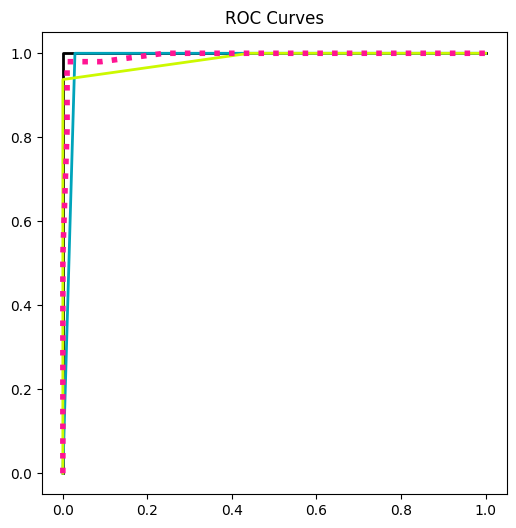

In [73]:
skplt.metrics.plot_roc(y_test, pred_proba, figsize=(6,6))
plt.show()

In [ ]:
model.fit(iris.iloc[:,:-1], iris.iloc[:,-1])
with open('model.pkl', 'wb') as fp:
    pickle.dump(model2, fp)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:

f = open('final_model.pkl', 'rb')
model3 = pickle.load(f)

In [ ]:
predicted_species = model3.predict(iris.iloc[:,:-1])
iris['predicted_species'] = predicted_species
iris.to_csv('iris_predicted.csv', index=False)